<a href="https://colab.research.google.com/github/shubhkhandare/YouTube-Data-Analysis/blob/main/youtube_india_trending_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/content/youtube_india_trending_full.csv")

In [6]:
df.head()

,title,channel_title,view_count,likes,comment_count,publish_time,trending_date,category,tags
0,Motivation Speech #0,TechnicalGuruji,14138828,232942,91210,2025-09-10,2025-09-18,Entertainment,"Motivation Speech, TechnicalGuruji, Trending I..."
1,Motivation Speech #1,NDTV,15582389,101576,78059,2025-03-19,2025-03-29,Comedy,"Motivation Speech, NDTV, Trending India"
2,Educational Lecture #2,TSeries,15931643,678470,29344,2025-10-07,2025-10-10,Sports,"Educational Lecture, TSeries, Trending India"
3,Cooking Recipe #3,TSeries,8041664,191618,87222,2025-01-19,2025-01-22,Music,"Cooking Recipe, TSeries, Trending India"
4,Comedy Video #4,VillageCookingChannel,3511040,759961,34885,2025-06-29,2025-07-06,Entertainment,"Comedy Video, VillageCookingChannel, Trending ..."


statistics

In [7]:
df.describe()

,view_count,likes,comment_count
count,3.000000e+02,3.000000e+02,300.000000
mean,1.020553e+07,7.095392e+05,102866.350000
std,5.801860e+06,4.211912e+05,55995.003095
min,4.190140e+05,2.117000e+03,1105.000000
25%,5.040130e+06,3.466725e+05,59014.000000
50%,1.021565e+07,7.066750e+05,101531.000000
75%,1.575050e+07,1.050529e+06,152196.500000
max,1.998267e+07,1.499593e+06,199588.000000


Structure of Database

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          300 non-null    object
 1   channel_title  300 non-null    object
 2   view_count     300 non-null    int64 
 3   likes          300 non-null    int64 
 4   comment_count  300 non-null    int64 
 5   publish_time   300 non-null    object
 6   trending_date  300 non-null    object
 7   category       300 non-null    object
 8   tags           300 non-null    object
dtypes: int64(3), object(6)
memory usage: 21.2+ KB


change data type of publish_time and trending_date to datetime

In [9]:
df['publish_time'] = pd.to_datetime(df['publish_time'])

In [10]:
df['trending_date'] = pd.to_datetime(df['trending_date'])

adding two new colums publish month and year

In [11]:
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          300 non-null    object        
 1   channel_title  300 non-null    object        
 2   view_count     300 non-null    int64         
 3   likes          300 non-null    int64         
 4   comment_count  300 non-null    int64         
 5   publish_time   300 non-null    datetime64[ns]
 6   trending_date  300 non-null    datetime64[ns]
 7   category       300 non-null    object        
 8   tags           300 non-null    object        
 9   publish_year   300 non-null    int32         
 10  publish_month  300 non-null    int32         
 11  publish_day    300 non-null    int32         
dtypes: datetime64[ns](2), int32(3), int64(3), object(4)
memory usage: 24.7+ KB


# 1 Top Channels by Number of Trending Videos

In [13]:
df_count  = df.groupby('channel_title')['view_count'].agg(views = 'sum', count ='count').sort_values(by='count', ascending=False)

In [14]:
print(df_count)

                           views  count
channel_title                          
CarryMinati            411586404     39
StarSportsIndia        351713427     36
NDTV                   381018898     34
AajTak                 336375685     34
TSeries                307327554     32
AshishChanchlani       273029537     28
TechnicalGuruji        242925550     26
BBKiVines              232447022     25
VillageCookingChannel  286891384     25
SonyMusicIndia         238344856     21


In [15]:
df_top = df_count.loc[df_count['views'].idxmax()]
print(df_top)

views    411586404
count           39
Name: CarryMinati, dtype: int64


In [16]:
df_count.max()

,0
views,411586404
count,39


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'CarryMinati'),
  Text(1, 0, 'StarSportsIndia'),
  Text(2, 0, 'NDTV'),
  Text(3, 0, 'AajTak'),
  Text(4, 0, 'TSeries'),
  Text(5, 0, 'AshishChanchlani'),
  Text(6, 0, 'TechnicalGuruji'),
  Text(7, 0, 'BBKiVines'),
  Text(8, 0, 'VillageCookingChannel'),
  Text(9, 0, 'SonyMusicIndia')])

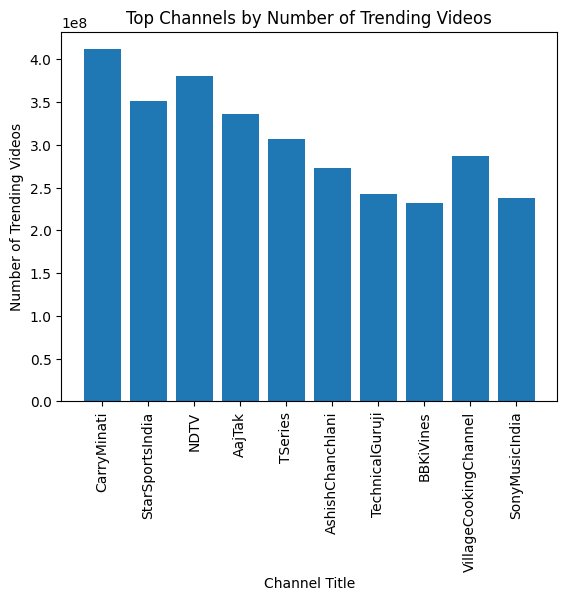

In [27]:
import matplotlib.pyplot as plt

plt.title('Top Channels by Number of Trending Videos')
plt.bar(df_count.index, df_count['views'])
plt.xlabel('Channel Title')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=90)

# 2. Category with Highest Average Views

In [17]:
df.groupby('category')['view_count'].mean().reset_index().sort_values(by='view_count',ascending=False)

,category,view_count
3,Music,1.160722e+07
4,News,1.139081e+07
5,Sports,1.066065e+07
0,Comedy,9.972871e+06
2,Entertainment,9.456488e+06
1,Education,8.212970e+06


In [18]:
df_cat = df.groupby('category')['view_count'].mean().reset_index().sort_values(by='view_count',ascending=False)

In [19]:
top_cat = df_cat.loc[df_cat['view_count'].idxmax()]
print(top_cat)


category               Music
view_count    11607217.55102
Name: 3, dtype: object


#3. Correlation Between Likes & Views

In [20]:
df_corelation = df['likes'].corr(df['view_count'])
print(df_corelation)

0.048605199810331984


Correlation Between Likes & Views for carry's channel


In [22]:
df_carry = df[df['channel_title'] == 'CarryMinati']
df_corr_carry = df_carry['likes'].corr(df_carry['view_count'])
print(df_corr_carry)

-0.011378260443157586


#**visualize** **data**

In [23]:
import matplotlib.pyplot as plt

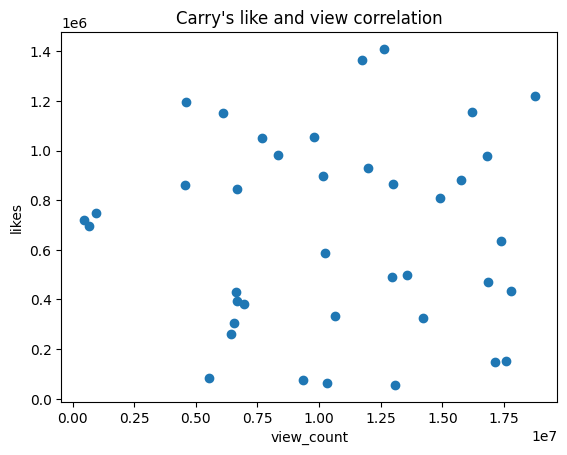

In [26]:
plt.title("Carry's like and view correlation")
plt.scatter(df_carry['view_count'], df_carry['likes'])
plt.xlabel('view_count')
plt.ylabel('likes')
plt.show()

Monthly Upload Trend

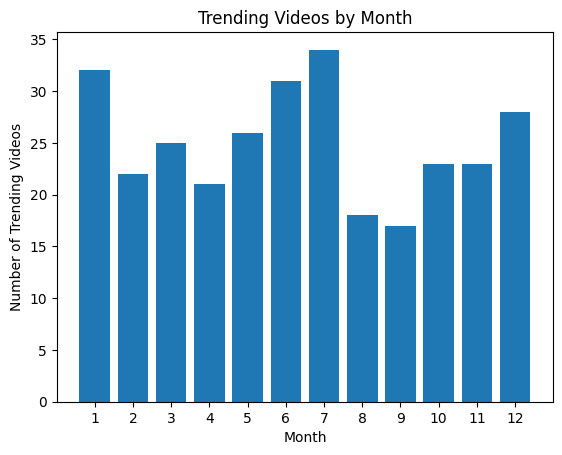

In [31]:
import matplotlib.pyplot as plt

upload_counts = df.groupby('publish_month')['title'].count()
plt.bar(upload_counts.index, upload_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Trending Videos')
plt.title('Trending Videos by Month')
plt.xticks(upload_counts.index)
plt.show()

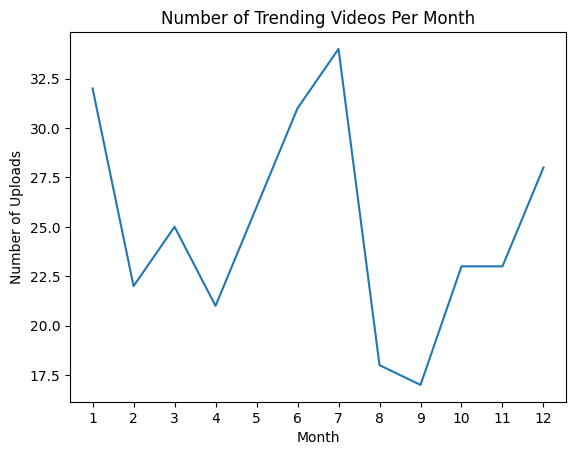

In [33]:


plt.plot(upload_counts.index, upload_counts.values)
plt.title('Number of Trending Videos Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Uploads')
plt.xticks(upload_counts.index)
plt.show()
